####A. Import Libraries and Data Set, and Inspect Data Set

**Initiate new SparkSession.**

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName('Employee_Attrition_Part_1').getOrCreate()

**Import numpy, pandas, and data visualization libraries.**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import IBM Employee Churn / Attrition comma-separated (CSV) file into a PySpark dataframe called churn.**

In [8]:
churn = spark.read.csv('/FileStore/tables/ibm_hr_emp_churn.csv', inferSchema=True, header=True)

**Create copy of churn dataframe for exploratory data analysis and feature engineering.**

In [10]:
churn1 = churn

**View first five rows of churn dataframe.**

In [12]:
display(churn1.head(5))

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Obtain number of rows and columns in churn dataframe.**

In [14]:
print(churn1.count(), len(churn1.columns))

1470 35

**View structure / schema of churn dataframe.**

In [16]:
churn1.printSchema()

root
-- Age: integer (nullable = true)
-- Attrition: string (nullable = true)
-- BusinessTravel: string (nullable = true)
-- DailyRate: integer (nullable = true)
-- Department: string (nullable = true)
-- DistanceFromHome: integer (nullable = true)
-- Education: integer (nullable = true)
-- EducationField: string (nullable = true)
-- EmployeeCount: integer (nullable = true)
-- EmployeeNumber: integer (nullable = true)
-- EnvironmentSatisfaction: integer (nullable = true)
-- Gender: string (nullable = true)
-- HourlyRate: integer (nullable = true)
-- JobInvolvement: integer (nullable = true)
-- JobLevel: integer (nullable = true)
-- JobRole: string (nullable = true)
-- JobSatisfaction: integer (nullable = true)
-- MaritalStatus: string (nullable = true)
-- MonthlyIncome: integer (nullable = true)
-- MonthlyRate: integer (nullable = true)
-- NumCompaniesWorked: integer (nullable = true)
-- Over18: string (nullable = true)
-- OverTime: string (nullable = true)
-- PercentSalaryHike: integer (nullable = true)
-- PerformanceRating: integer (nullable = true)
-- RelationshipSatisfaction: integer (nullable = true)
-- StandardHours: integer (nullable = true)
-- StockOptionLevel: integer (nullable = true)
-- TotalWorkingYears: integer (nullable = true)
-- TrainingTimesLastYear: integer (nullable = true)
-- WorkLifeBalance: integer (nullable = true)
-- YearsAtCompany: integer (nullable = true)
-- YearsInCurrentRole: integer (nullable = true)
-- YearsSinceLastPromotion: integer (nullable = true)
-- YearsWithCurrManager: integer (nullable = true)

**Check for presence of missing values for all features.**

In [18]:
from pyspark.sql.functions import col, sum

In [19]:
is_null_sum = churn1.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in churn1.columns))
display(is_null_sum)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


####B. Explore and Engineer Categorical Features

**Gather summary statistics for categorical features.**

In [22]:
display(churn1.describe())

summary,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
mean,36.923809523809524,null,null,802.4857142857143,null,9.19251700680272,2.912925170068027,null,1.0,1024.865306122449,2.721768707482993,null,65.89115646258503,2.7299319727891156,2.0639455782312925,null,2.7285714285714286,null,6502.931292517007,14313.103401360544,2.6931972789115646,null,null,15.209523809523809,3.1537414965986397,2.7122448979591836,80.0,0.7938775510204081,11.279591836734694,2.7993197278911564,2.7612244897959184,7.0081632653061225,4.229251700680272,2.1877551020408164,4.12312925170068
stddev,9.135373489136729,null,null,403.50909994352804,null,8.10686443566608,1.0241649445978718,null,0.0,602.0243348474752,1.0930822146350003,null,20.329427593996176,0.7115611429632297,1.1069398989351202,null,1.1028461230547213,null,4707.956783097992,7117.786044059972,2.4980090060707463,null,null,3.6599377165396385,0.36082352460434397,1.0812088864403517,0.0,0.8520766679308381,7.780781675514995,1.2892706207958466,0.7064758297141507,6.126525152403571,3.623137034670627,3.2224302791379693,3.5681361205404363
min,18,No,Non-Travel,102,Human Resources,1,1,Human Resources,1,1,1,Female,30,1,1,Healthcare Representative,1,Divorced,1009,2094,0,Y,No,11,3,1,80,0,0,0,1,0,0,0,0
max,60,Yes,Travel_Rarely,1499,Sales,29,5,Technical Degree,1,2068,4,Male,100,4,5,Sales Representative,4,Single,19999,26999,9,Y,Yes,25,4,4,80,3,40,6,4,40,18,15,17


**Obtain value counts for Attrition variable.**

In [24]:
display(churn1.groupBy('Attrition').count())

Attrition,count
No,1233
Yes,237


**Generate Churn dummy variable by mapping Attrition categories to 0 or 1. (0 = No, 1 = Yes)**

In [26]:
from pyspark.ml.feature import StringIndexer

In [27]:
churn_indexer = StringIndexer(inputCol='Attrition', outputCol='Churn')
churn_dum = churn_indexer.fit(churn1).transform(churn1)
display(churn_dum.groupBy('Churn').count())

Churn,count
0.0,1233
1.0,237


**Obtain value counts for BusinessTravel variable.**

In [29]:
display(churn_dum.groupBy('BusinessTravel').count().orderBy('BusinessTravel'))

BusinessTravel,count
Non-Travel,150
Travel_Frequently,277
Travel_Rarely,1043


**Convert BusinessTravel to numeric BusTravLevel (Business Travel Level) variable. (0 = Non-Travel, 1 = Travel_Rarely, 2 = Travel_Frequently)**

In [31]:
from pyspark.sql import functions as F

In [32]:
churn_btl = churn_dum.withColumn('BusTravLevel', F.when(col('BusinessTravel') == 'Non-Travel', 0).when(col('BusinessTravel') == 'Travel_Rarely', 1).otherwise(2))
display(churn_btl.groupBy('BusTravLevel').count().orderBy('BusTravLevel'))

BusTravLevel,count
0,150
1,1043
2,277


**Obtain value counts and employee churn probabilities for each Department.**

In [34]:
display(churn_btl.withColumn('Dept', churn_btl['Department']).groupBy('Dept').agg(F.count('Department').alias('count'), F.mean('Churn').alias('mean')).orderBy('Dept'))

Dept,count,mean
Human Resources,63,0.19047619047619047
Research & Development,961,0.1383975026014568
Sales,446,0.2062780269058296


**Create Department dummy variables and add it to churn dataframe.**

In [36]:
departments = churn_btl.select('Department').distinct().rdd.flatMap(lambda x: x).collect()
dept_dummies = [F.when(F.col('Department') == dept, 1).otherwise(0).alias(str(dept)) for dept in departments]
churn_dept = churn_btl.select(churn_btl.columns + dept_dummies).drop('Research & Development')
churn_dept = churn_dept.withColumnRenamed('Sales', 'Sales_Dept').withColumnRenamed('Human Resources', 'HR_Dept')
display(churn_dept.head(5))

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn,BusTravLevel,Sales_Dept,HR_Dept
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0,1,1,0
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0,2,0,0
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0,1,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0,2,0,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0,1,0,0


**Obtain value counts and employee churn probabilities for each Education Field.**

In [38]:
display(churn_dept.withColumn('EduField', churn_dept['EducationField']).groupBy('EduField').agg(F.count('EducationField').alias('count'), F.mean('Churn').alias('mean')).orderBy('EduField'))

EduField,count,mean
Human Resources,27,0.25925925925925924
Life Sciences,606,0.14686468646864687
Marketing,159,0.22012578616352202
Medical,464,0.13577586206896552
Other,82,0.13414634146341464
Technical Degree,132,0.24242424242424243


**Create Education Field dummy variables and add it to churn dataframe.**

In [40]:
fields = churn_dept.select('EducationField').distinct().rdd.flatMap(lambda x: x).collect()
edu_dummies = [F.when(F.col('EducationField') == field, 1).otherwise(0).alias(str(field)) for field in fields]
churn_edu = churn_dept.select(churn_dept.columns + edu_dummies).drop('Life Sciences')
churn_edu = churn_edu.withColumnRenamed('Human Resources', 'HR_Major').withColumnRenamed('Technical Degree', 'Tech_Major').withColumnRenamed('Marketing', 'Market_Major').withColumnRenamed('Medical', 'Med_Major').withColumnRenamed('Other', 'Other_Major')
display(churn_edu.head(5))

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn,BusTravLevel,Sales_Dept,HR_Dept,Tech_Major,Other_Major,Market_Major,Med_Major,HR_Major
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0,1,1,0,0,0,0,0,0
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0,2,0,0,0,0,0,0,0
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0,1,0,0,0,1,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0,2,0,0,0,0,0,0,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0,1,0,0,0,0,0,1,0


**Obtain value counts for Gender variable.**

In [42]:
display(churn_edu.groupBy('Gender').count())

Gender,count
Female,588
Male,882


**Generate Gender_Dum dummy variable by mapping Gender categories to 0 or 1. (0 = Male, 1 = Female)**

In [44]:
gender_indexer = StringIndexer(inputCol='Gender', outputCol='Gender_Dum')
churn_gender = gender_indexer.fit(churn_edu).transform(churn_edu)
display(churn_gender.groupBy('Gender_Dum').count())

Gender_Dum,count
0.0,882
1.0,588


**Obtain value counts and employee churn probabilities for each Job Role.**

In [46]:
display(churn_gender.withColumn('Position', churn_gender['JobRole']).groupBy('Position').agg(F.count('JobRole').alias('count'), F.mean('Churn').alias('mean')).orderBy('Position'))

Position,count,mean
Healthcare Representative,131,0.06870229007633588
Human Resources,52,0.23076923076923078
Laboratory Technician,259,0.23938223938223938
Manager,102,0.049019607843137254
Manufacturing Director,145,0.06896551724137931
Research Director,80,0.025
Research Scientist,292,0.16095890410958905
Sales Executive,326,0.17484662576687116
Sales Representative,83,0.39759036144578314


**Create Job Role dummy variables and add it to churn dataframe.**

In [48]:
jobs = churn_gender.select('JobRole').distinct().rdd.flatMap(lambda x: x).collect()
job_dummies = [F.when(F.col('JobRole') == job, 1).otherwise(0).alias(str(job)) for job in jobs]
churn_job = churn_gender.select(churn_gender.columns + job_dummies).drop('Sales Executive')
churn_job = churn_job.withColumnRenamed('Sales Representative', 'Sales_Rep').withColumnRenamed('Laboratory Technician', 'Lab_Tech').withColumnRenamed('Human Resources', 'HR').withColumnRenamed('Research Scientist', 'Research_Sci').withColumnRenamed('Manufacturing Director', 'Manuf_Dir').withColumnRenamed('Healthcare Representative', 'HC_Rep').withColumnRenamed('Manager', 'Mgr').withColumnRenamed('Research Director', 'Research_Dir')
display(churn_job.head(5))

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn,BusTravLevel,Sales_Dept,HR_Dept,Tech_Major,Other_Major,Market_Major,Med_Major,HR_Major,Gender_Dum,Manuf_Dir,Lab_Tech,Sales_Rep,HC_Rep,Research_Sci,Mgr,Research_Dir,HR
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0,1,1,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0,2,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0,1,0,0,0,1,0,0,0,0.0,0,1,0,0,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0,2,0,0,0,0,0,0,0,1.0,0,0,0,0,1,0,0,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0,1,0,0,0,0,0,1,0,0.0,0,1,0,0,0,0,0,0


**Obtain value counts and employee churn probabilities for each Marital Status.**

In [50]:
display(churn_job.withColumn('Mar_Status', churn_job['MaritalStatus']).groupBy('Mar_Status').agg(F.count('MaritalStatus').alias('count'), F.mean('Churn').alias('mean')).orderBy('Mar_Status'))

Mar_Status,count,mean
Divorced,327,0.10091743119266056
Married,673,0.12481426448736999
Single,470,0.2553191489361702


**Create Marital Status dummy variable and add it to churn dataframe.**

In [52]:
statuses = churn_job.select('MaritalStatus').distinct().rdd.flatMap(lambda x: x).collect()
marital_dummies = [F.when(F.col('MaritalStatus') == status, 1).otherwise(0).alias(str(status)) for status in statuses]
churn_mar = churn_job.select(churn_job.columns + marital_dummies).drop('Married')
display(churn_mar.head(5))

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn,BusTravLevel,Sales_Dept,HR_Dept,Tech_Major,Other_Major,Market_Major,Med_Major,HR_Major,Gender_Dum,Manuf_Dir,Lab_Tech,Sales_Rep,HC_Rep,Research_Sci,Mgr,Research_Dir,HR,Divorced,Single
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0,1,1,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,1
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0,2,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0,1,0,0,0,1,0,0,0,0.0,0,1,0,0,0,0,0,0,0,1
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0,2,0,0,0,0,0,0,0,1.0,0,0,0,0,1,0,0,0,0,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0,1,0,0,0,0,0,1,0,0.0,0,1,0,0,0,0,0,0,0,0


**Obtain value counts for Over18 variable.**

In [54]:
display(churn_mar.groupBy('Over18').count())

Over18,count
Y,1470


**Obtain value counts for OverTime variable.**

In [56]:
display(churn_mar.groupBy('OverTime').count())

OverTime,count
No,1054
Yes,416


**Generate Overtime_Dum dummy variable by mapping OverTime categories to 0 or 1. (0 = No, 1 = Yes)**

In [58]:
ot_indexer = StringIndexer(inputCol='OverTime', outputCol='Overtime_Dum')
churn_ot = ot_indexer.fit(churn_mar).transform(churn_mar)
display(churn_ot.groupBy('Overtime_Dum').count())

Overtime_Dum,count
0.0,1054
1.0,416


**Drop unengineered or unnecessary categorical features from churn dataframe.**

In [60]:
cat_cols_to_drop = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
churn_eng_cat = churn_ot.drop(*cat_cols_to_drop)

**Obtain number of rows and columns in churn dataframe with engineered categorical features and unengineered numerical features.**

In [62]:
print(churn_eng_cat.count(), len(churn_eng_cat.columns))

1470 47

**View structure of churn dataframe with engineered categorical features and unengineered numerical features.**

In [64]:
churn_eng_cat.printSchema()

root
-- Age: integer (nullable = true)
-- DailyRate: integer (nullable = true)
-- DistanceFromHome: integer (nullable = true)
-- Education: integer (nullable = true)
-- EmployeeCount: integer (nullable = true)
-- EmployeeNumber: integer (nullable = true)
-- EnvironmentSatisfaction: integer (nullable = true)
-- HourlyRate: integer (nullable = true)
-- JobInvolvement: integer (nullable = true)
-- JobLevel: integer (nullable = true)
-- JobSatisfaction: integer (nullable = true)
-- MonthlyIncome: integer (nullable = true)
-- MonthlyRate: integer (nullable = true)
-- NumCompaniesWorked: integer (nullable = true)
-- PercentSalaryHike: integer (nullable = true)
-- PerformanceRating: integer (nullable = true)
-- RelationshipSatisfaction: integer (nullable = true)
-- StandardHours: integer (nullable = true)
-- StockOptionLevel: integer (nullable = true)
-- TotalWorkingYears: integer (nullable = true)
-- TrainingTimesLastYear: integer (nullable = true)
-- WorkLifeBalance: integer (nullable = true)
-- YearsAtCompany: integer (nullable = true)
-- YearsInCurrentRole: integer (nullable = true)
-- YearsSinceLastPromotion: integer (nullable = true)
-- YearsWithCurrManager: integer (nullable = true)
-- Churn: double (nullable = false)
-- BusTravLevel: integer (nullable = false)
-- Sales_Dept: integer (nullable = false)
-- HR_Dept: integer (nullable = false)
-- Tech_Major: integer (nullable = false)
-- Other_Major: integer (nullable = false)
-- Market_Major: integer (nullable = false)
-- Med_Major: integer (nullable = false)
-- HR_Major: integer (nullable = false)
-- Gender_Dum: double (nullable = false)
-- Manuf_Dir: integer (nullable = false)
-- Lab_Tech: integer (nullable = false)
-- Sales_Rep: integer (nullable = false)
-- HC_Rep: integer (nullable = false)
-- Research_Sci: integer (nullable = false)
-- Mgr: integer (nullable = false)
-- Research_Dir: integer (nullable = false)
-- HR: integer (nullable = false)
-- Divorced: integer (nullable = false)
-- Single: integer (nullable = false)
-- Overtime_Dum: double (nullable = false)

####C. Explore and Engineer Numerical Features

**Drop unnecessary numerical features from churn dataframe.**

In [67]:
num_cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
churn_uneng_num = churn_eng_cat.drop(*num_cols_to_drop)

**Remap ordered numerical features so that lowest level is 0 instead of 1.**

In [69]:
churn_eng_cols = churn_uneng_num.withColumn('Education', F.when(col('Education') == 1, 0).when(col('Education') == 2, 1).when(col('Education') == 3, 2).when(col('Education') == 4, 3).otherwise(4)).withColumn('EnvironmentSatisfaction', F.when(col('EnvironmentSatisfaction') == 1, 0).when(col('EnvironmentSatisfaction') == 2, 1).when(col('EnvironmentSatisfaction') == 3, 2).otherwise(3)).withColumn('JobInvolvement', F.when(col('JobInvolvement') == 1, 0).when(col('JobInvolvement') == 2, 1).when(col('JobInvolvement') == 3, 2).otherwise(3)).withColumn('JobLevel', F.when(col('JobLevel') == 1, 0).when(col('JobLevel') == 2, 1).when(col('JobLevel') == 3, 2).when(col('JobLevel') == 4, 3).otherwise(4)).withColumn('JobSatisfaction', F.when(col('JobSatisfaction') == 1, 0).when(col('JobSatisfaction') == 2, 1).when(col('JobSatisfaction') == 3, 2).otherwise(3)).withColumn('PerformanceRating', F.when(col('PerformanceRating') == 1, 0).when(col('PerformanceRating') == 2, 1).when(col('PerformanceRating') == 3, 2).otherwise(3)).withColumn('RelationshipSatisfaction', F.when(col('RelationshipSatisfaction') == 1, 0).when(col('RelationshipSatisfaction') == 2, 1).when(col('RelationshipSatisfaction') == 3, 2).otherwise(3)).withColumn('WorkLifeBalance', F.when(col('WorkLifeBalance') == 1, 0).when(col('WorkLifeBalance') == 2, 1).when(col('WorkLifeBalance') == 3, 2).otherwise(3))

**Extract numerical features from churn dataframe to see correlation matrix between features.**

In [71]:
num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
churn_num_feat = churn_eng_cols.select(num_features)

**Check the number of numerical features.**

In [73]:
print(churn_num_feat.count(), len(churn_num_feat.columns))

1470 23

**Convert numerical features PySpark dataframe to Pandas dataframe and generate unannotated correlation matrix heatmap from Pandas dataframe.**

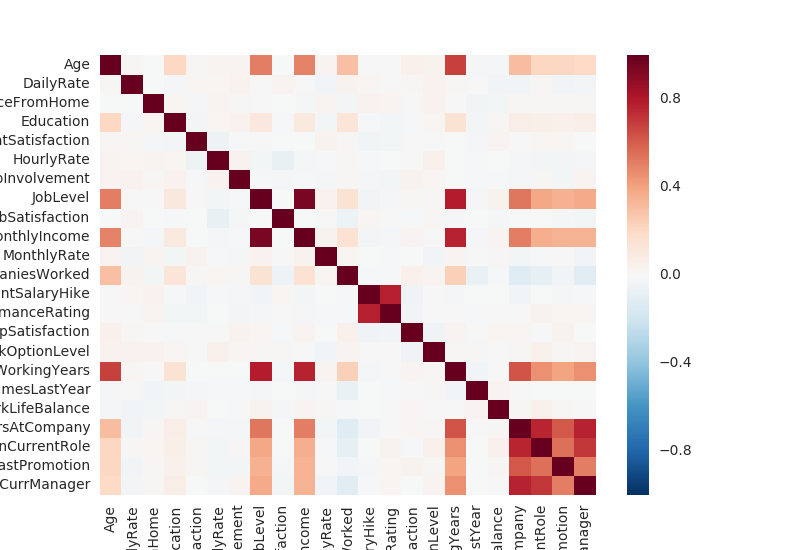

In [75]:
churn_num_feat_pd = churn_num_feat.toPandas()

corr_hm, ax = plt.subplots()
ax = sns.heatmap(churn_num_feat_pd.corr(), fmt=".2f")
display(corr_hm)

**Convert numerical features into vector column using VectorAssembler and generate correlation matrix.**

In [77]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

In [78]:
num_feat_vect_col = 'corr_features'
num_feat_vect_assembler = VectorAssembler(inputCols=churn_num_feat.columns, outputCol=num_feat_vect_col)
num_feat_vect = num_feat_vect_assembler.transform(churn_num_feat).select(num_feat_vect_col)

In [79]:
num_feat_corr_matrix = Correlation.corr(num_feat_vect, num_feat_vect_col, method='pearson')

In [80]:
num_feat_corr_matrix.collect()[0]['pearson({})'.format(num_feat_vect_col)].values

Out[ 42 ]: 
array([ 1.00000000e+00, 1.06609426e-02, -1.68612015e-03,
 2.08033731e-01, 1.01464279e-02, 2.42865426e-02,
 2.98199586e-02, 5.09604228e-01, -4.89187715e-03,
 4.97854567e-01, 2.80511671e-02, 2.99634758e-01,
 3.63358491e-03, 1.90389551e-03, 5.35347197e-02,
 3.75097124e-02, 6.80380536e-01, -1.96208189e-02,
 -2.14900280e-02, 3.11308770e-01, 2.12901056e-01,
 2.16513368e-01, 2.02088602e-01, 1.06609426e-02,
 1.00000000e+00, -4.98533735e-03, -1.68064332e-02,
 1.83548543e-02, 2.33814215e-02, 4.61348740e-02,
 2.96633486e-03, 3.05710078e-02, 7.70705887e-03,
 -3.21816015e-02, 3.81534343e-02, 2.27036775e-02,
 4.73296327e-04, 7.84603096e-03, 4.21427964e-02,
 1.45147387e-02, 2.45254271e-03, -3.78480510e-02,
 -3.40547676e-02, 9.93201496e-03, -3.32289848e-02,
 -2.63631782e-02, -1.68612015e-03, -4.98533735e-03,
 1.00000000e+00, 2.10418256e-02, -1.60753270e-02,
 3.11305856e-02, 8.78327989e-03, 5.30273055e-03,
 -3.66883917e-03, -1.70144447e-02, 2.74728635e-02,
 -2.92508042e-02, 4.02353775e-02, 2.71096185e-02,
 6.55747465e-03, 4.48719989e-02, 4.62842586e-03,
 -3.69422343e-02, -2.65560041e-02, 9.50771990e-03,
 1.88449991e-02, 1.00288359e-02, 1.44060484e-02,
 2.08033731e-01, -1.68064332e-02, 2.10418256e-02,
 1.00000000e+00, -2.71283133e-02, 1.67748289e-02,
 4.24376343e-02, 1.01588886e-01, -1.12961167e-02,
 9.49606770e-02, -2.60841972e-02, 1.26316560e-01,
 -1.11109409e-02, -2.45387912e-02, -9.11837670e-03,
 1.84222202e-02, 1.48279697e-01, -2.51002411e-02,
 9.81918931e-03, 6.91136960e-02, 6.02355541e-02,
 5.42543336e-02, 6.90653783e-02, 1.01464279e-02,
 1.83548543e-02, -1.60753270e-02, -2.71283133e-02,
 1.00000000e+00, -4.98569562e-02, -8.27759817e-03,
 1.21169945e-03, -6.78435260e-03, -6.25908775e-03,
 3.75996229e-02, 1.25943232e-02, -3.17011952e-02,
 -2.95479523e-02, 7.66538354e-03, 3.43215776e-03,
 -2.69307039e-03, -1.93593083e-02, 2.76272955e-02,
 1.45754919e-03, 1.80074601e-02, 1.61936056e-02,
 -4.99872263e-03, 2.42865426e-02, 2.33814215e-02,
 3.11305856e-02, 1.67748289e-02, -4.98569562e-02,
 1.00000000e+00, 4.28606410e-02, -2.78534864e-02,
 -7.13346244e-02, -1.57943044e-02, -1.52967496e-02,
 2.21568834e-02, -9.06198625e-03, -2.17169743e-03,
 1.33045279e-03, 5.02633991e-02, -2.33368182e-03,
 -8.54768521e-03, -4.60723375e-03, -1.95816162e-02,
 -2.41062202e-02, -2.67155861e-02, -2.01232002e-02,
 2.98199586e-02, 4.61348740e-02, 8.78327989e-03,
 4.24376343e-02, -8.27759817e-03, 4.28606410e-02,
 1.00000000e+00, -1.26298827e-02, -2.14759103e-02,
 -1.52714908e-02, -1.63220791e-02, 1.50124132e-02,
 -1.72045722e-02, -2.90713334e-02, 3.42968206e-02,
 2.15226404e-02, -5.53318206e-03, -1.53378258e-02,
 -1.46165932e-02, -2.13554270e-02, 8.71696350e-03,
 -2.41842924e-02, 2.59758079e-02, 5.09604228e-01,
 2.96633486e-03, 5.30273055e-03, 1.01588886e-01,
 1.21169945e-03, -2.78534864e-02, -1.26298827e-02,
 1.00000000e+00, -1.94370803e-03, 9.50299913e-01,
 3.95629510e-02, 1.42501124e-01, -3.47304923e-02,
 -2.12220821e-02, 2.16415105e-02, 1.39839105e-02,
 7.82207805e-01, -1.81905502e-02, 3.78177456e-02,
 5.34738687e-01, 3.89446733e-01, 3.53885347e-01,
 3.75280608e-01, -4.89187715e-03, 3.05710078e-02,
 -3.66883917e-03, -1.12961167e-02, -6.78435260e-03,
 -7.13346244e-02, -2.14759103e-02, -1.94370803e-03,
 1.00000000e+00, -7.15674236e-03, 6.43916943e-04,
 -5.56994260e-02, 2.00020394e-02, 2.29719706e-03,
 -1.24535932e-02, 1.06902261e-02, -2.01850727e-02,
 -5.77933496e-03, -1.94587102e-02, -3.80262795e-03,
 -2.30478523e-03, -1.82135678e-02, -2.76562139e-02,
 4.97854567e-01, 7.70705887e-03, -1.70144447e-02,
 9.49606770e-02, -6.25908775e-03, -1.57943044e-02,
 -1.52714908e-02, 9.50299913e-01, -7.15674236e-03,
 1.00000000e+00, 3.48136261e-02, 1.49515216e-01,
 -2.72685864e-02, -1.71201382e-02, 2.58734361e-02,
 5.40767670e-03, 7.72893246e-01, -2.17362768e-02,
 3.06830816e-02, 5.14284826e-01, 3.63817667e-01,
 3.44977638e-01, 3.44078883e-01, 2.80511671e-02,
 -3.21816015e-02, 2.74728635e-02, -2.60841972e-02,
 3.75996229e-02, -1.52967496e-02, -1.63220791e-02,
 3.95629510

####D. Feature Selection

**Select predictor features for modeling by training random forest classification model on entire churn dataframe with all engineered features and filtering out features based off their model importances.**

In [83]:
from pyspark.ml.linalg import Vectors

In [84]:
feat_assembler = VectorAssembler(inputCols=['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusTravLevel', 'Sales_Dept', 'HR_Dept', 'Tech_Major', 'Other_Major', 'Market_Major', 'Med_Major', 'HR_Major', 'Gender_Dum', 'Manuf_Dir', 'Lab_Tech', 'Sales_Rep', 'HC_Rep', 'Research_Sci', 'Mgr', 'Research_Dir', 'HR', 'Divorced', 'Single', 'Overtime_Dum'], outputCol='features')

In [85]:
rfc_model_data = feat_assembler.transform(churn_eng_cols).select(['Churn', 'features'])

In [86]:
from pyspark.ml.classification import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier(labelCol='Churn', featuresCol='features', seed=101)
rfc_model = rfc.fit(rfc_model_data)

**List out random forest predictor features and their respective importances.**

In [89]:
feature_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusTravLevel', 'Sales_Dept', 'HR_Dept', 'Tech_Major', 'Other_Major', 'Market_Major', 'Med_Major', 'HR_Major', 'Gender_Dum', 'Manuf_Dir', 'Lab_Tech', 'Sales_Rep', 'HC_Rep', 'Research_Sci', 'Mgr', 'Research_Dir', 'HR', 'Divorced', 'Single', 'Overtime_Dum']
dict(zip(feature_cols, rfc_model.featureImportances))

Out[ 48 ]: 
{'Manuf_Dir': 0.0014307525239782213,
 'TrainingTimesLastYear': 0.019215258063992938,
 'HR_Dept': 0.0014589450013845723,
 'Divorced': 0.01398568241994397,
 'Single': 0.013922940057578406,
 'PerformanceRating': 0.0042555266738991326,
 'BusTravLevel': 0.026054574531989783,
 'NumCompaniesWorked': 0.018855002693446442,
 'Mgr': 0.0034903043986585641,
 'Sales_Rep': 0.026164554840722037,
 'StockOptionLevel': 0.035703545113518725,
 'HR': 0.0033544220469723476,
 'JobLevel': 0.034157180915355988,
 'Education': 0.019579278511145808,
 'JobInvolvement': 0.033025814097018595,
 'Market_Major': 0.006176503129007728,
 'YearsSinceLastPromotion': 0.013164764981488554,
 'YearsWithCurrManager': 0.030502742062604345,
 'Age': 0.12149603900957957,
 'Other_Major': 0.0016624111070485878,
 'MonthlyRate': 0.01200354123260176,
 'TotalWorkingYears': 0.064670281679533786,
 'DistanceFromHome': 0.026189609208321269,
 'YearsInCurrentRole': 0.036177463696938833,
 'JobSatisfaction': 0.0093923038033010397,
 'Research_Sci': 0.0039055451755409822,
 'MonthlyIncome': 0.087113481514046243,
 'HR_Major': 0.0,
 'Overtime_Dum': 0.10575559598240444,
 'WorkLifeBalance': 0.029990178174626798,
 'Research_Dir': 0.0,
 'DailyRate': 0.024377924561016822,
 'HC_Rep': 0.0,
 'Sales_Dept': 0.0017517751177862882,
 'HourlyRate': 0.020788880355014184,
 'Med_Major': 0.002701715194155116,
 'Lab_Tech': 0.0020365998355995505,
 'RelationshipSatisfaction': 0.0067493093898742485,
 'EnvironmentSatisfaction': 0.034560771355014938,
 'Tech_Major': 0.0023235548492282891,
 'Gender_Dum': 0.0010001076946577789,
 'YearsAtCompany': 0.069488416941120526,
 'PercentSalaryHike': 0.031366702059883018}

* Based off the above predictor feature importances, unannotated numerical feature correlation matrix heatmap, and business logic / domain knowledge, I have decided to include only these features to build the machine learning models: Age, DistanceFromHome, EnvironmentSatisfaction, JobInvolvement, MonthlyIncome, StockOptionLevel, Sales_Rep, Single, BusTravLevel, and Overtime_Dum.

**Create churn / attrition modeling data by selecting target feature and predictor features for modeling.**

In [92]:
modeling_cols = ['Churn', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'MonthlyIncome', 'StockOptionLevel', 'Sales_Rep', 'Single', 'BusTravLevel', 'Overtime_Dum']
churn_model = churn_eng_cols.select(modeling_cols)

**Obtain value counts and employee churn probabilities for Overtime_Dum (Overtime dummy) variable, a categorical feature that highly impacts likelihood of employee to churn.**

In [94]:
display(churn_model.withColumn('OT_Dummy', churn_model['Overtime_Dum']).groupBy('OT_Dummy').agg(F.count('Overtime_Dum').alias('count'), F.mean('Churn').alias('mean')).orderBy('OT_Dummy'))

OT_Dummy,count,mean
0.0,1054,0.10436432637571158
1.0,416,0.30528846153846156


**Generate histogram for MonthlyIncome, a numerical feature that highly impacts likelihood of employee to churn.**

In [96]:
display(churn_model.select(['Churn', 'MonthlyIncome']))

Churn,MonthlyIncome
1.0,5993
0.0,5130
1.0,2090
0.0,2909
0.0,3468
0.0,3068
0.0,2670
0.0,2693
0.0,9526
0.0,5237
